In [1]:
# Converting Greeks symbols to UTF-8

import json


# Open-read JSON file with unocode-escape
with open("message_1_gtms.json", "r", encoding="unicode-escape") as file:
    json_content = file.read()

# Convert JSON to UTF-8
converted_json_content = json_content.encode("latin1").decode("utf-8")

# Save the converted JSON 
output_file_path = "converted_message_23.json"
with open(output_file_path, "w", encoding="utf-8") as output_file:
    output_file.write(converted_json_content)

print(f"Converted JSON saved to: {output_file_path}")


Converted JSON saved to: converted_message_23.json


In [2]:
import json
import re


#this code takes the dataset from messenger and removing all the special characters from JSON also translates the greeklish to english w
#with letter by letter translation


# Mapping dictionary for Greeklish to Greek translation
greeklish_to_greek = {
    'a': 'α',
    'b': 'β',
    'g': 'γ',
    'd': 'δ',
    'e': 'ε',
    'z': 'ζ',
    'h': 'η',
    '8': 'θ',
    'th':'θ',
    'i': 'ι',
    'k': 'κ',
    'l': 'λ',
    'm': 'μ',
    'n': 'ν',
    'x': 'χ',
    'o': 'ο',
    'p': 'π',
    'r': 'ρ',
    's': 'σ',
    't': 'τ',
    'y': 'υ',
    'f': 'φ',
    'c': 'χ',
    'q': 'ψ',
    'w': 'ω',
    'v': 'β',
    'πσ': 'ψ'
}

# Clean up the invalid greek characters from dataset with regex
def remove_invalid_characters(text):
    cleaned_text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    return cleaned_text

def translate_greeklish_to_greek(greeklish_text):
    # Convert each Greeklish character to Greek using the mapping dictionary
    translated_text = ''.join([greeklish_to_greek.get(char.lower(), char) for char in greeklish_text])
    return translated_text

with open('converted_message_23.json', 'r', encoding='utf-8-sig') as file:
    raw_json_data = file.read()

# Remove invalid control characters from the JSON data
cleaned_json_data = remove_invalid_characters(raw_json_data)

# Parse the cleaned JSON data
json_data = json.loads(cleaned_json_data)

# Iterate through each message in the JSON data - Checking content and reactions of conversation
for message in json_data['messages']:
    if 'content' in message:
        content = message['content']
        
        # Check if the message has reactions
        if 'reactions' in message:
            # Remove the reactions
            del message['reactions']

        # Translate the content from Greeklish to Greek
        translated_content = translate_greeklish_to_greek(content)

        # Update the content in the message
        message['content'] = translated_content

# Save the modified JSON
with open('translated_json_file_one.json', 'w', encoding='utf-8') as file:
    json.dump(json_data, file, ensure_ascii=False, indent=4)

print("Translation completed. 'translated_json_file_one.json'.")


Translation completed. 'translated_json_file_one.json'.


Message counts have been written to 'message_counts.xlsx'.
Reaction counts have been written to 'reaction_counts.xlsx'.


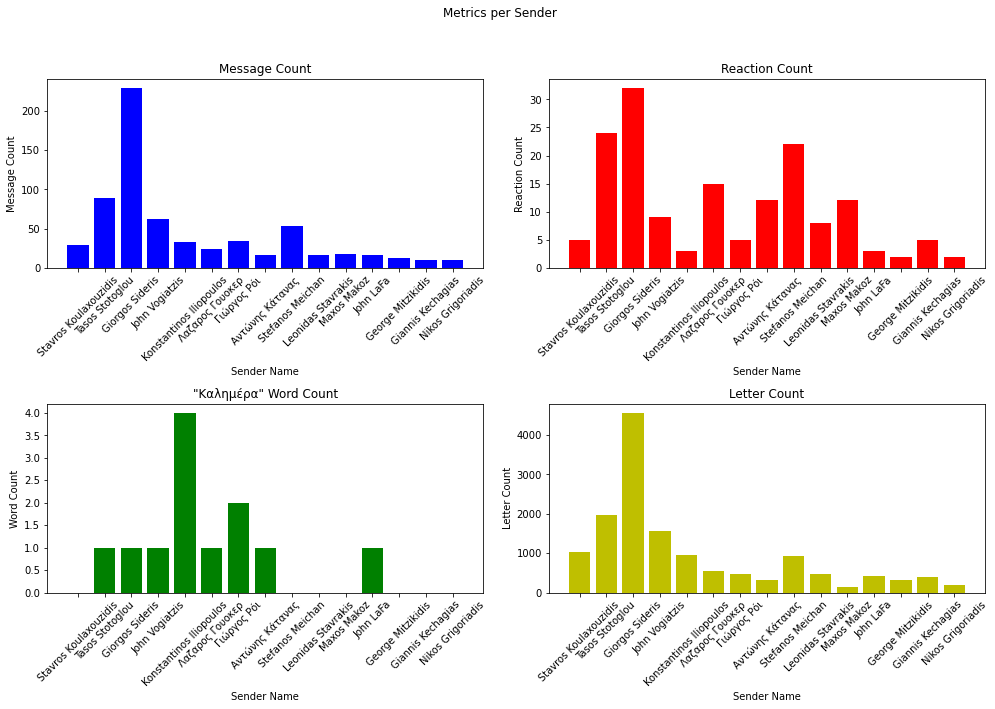

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 27 17:40:20 2023

@author: Tasos
"""

import json
import pandas as pd
import matplotlib.pyplot as plt


# Load the JSON data from file
with open('translated_json_file_one.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)
    
# Senders Name Counter 
# Extract the sender_name and count the number of messages for each sender_name
sender_counts = {}
for message in json_data['messages']:
    if 'sender_name' in message:
        sender_name = message['sender_name']
        if sender_name in sender_counts:
            sender_counts[sender_name] += 1
        else:
            sender_counts[sender_name] = 1

# Convert the dictionary to a DataFrame
df_message_counts = pd.DataFrame(sender_counts.items(), columns=['sender_name', 'message_count'])

# Write the DataFrame to an Excel file
df_message_counts.to_excel('message_counts.xlsx', index=False)

print("Message counts have been written to 'message_counts.xlsx'.")


# Senders Reaction Counter 
# Extract the sender_name and count the number of reactions for each sender_name
sender_reaction_counts = {}
for message in json_data['messages']:
    if 'reactions' in message:
        sender_name = message['sender_name']
        reaction_count = len(message['reactions'])
        if sender_name in sender_reaction_counts:
            sender_reaction_counts[sender_name] += reaction_count
        else:
            sender_reaction_counts[sender_name] = reaction_count

# Convert the dictionary to a DataFrame
df_reaction_counts = pd.DataFrame(sender_reaction_counts.items(), columns=['sender_name', 'reaction_count'])

# Write the DataFrame to an Excel file
df_reaction_counts.to_excel('reaction_counts.xlsx', index=False)

print("Reaction counts have been written to 'reaction_counts.xlsx'.")


# "Kαλημέρα" Word Counter 
# Define the target words
target_words = ["καλημέρα", "καλημερα"]

# Initialize a dictionary to store the word counts per sender
sender_word_counts = {}

# Iterate through the messages and count the occurrences of the target words for each sender
for message in json_data['messages']:
    if 'sender_name' in message and 'content' in message:
        sender_name = message['sender_name']
        content = message['content']
        content_lower = content.lower()  # Convert to lowercase for case-insensitive matching
        word_count = sum(content_lower.count(word.lower()) for word in target_words)
        if sender_name in sender_word_counts:
            sender_word_counts[sender_name] += word_count
        else:
            sender_word_counts[sender_name] = word_count

# Create a DataFrame from the dictionary
df_word_counts = pd.DataFrame(sender_word_counts.items(), columns=['sender_name', 'word_count'])

# Write the DataFrame to an Excel file
df_word_counts.to_excel('word_counts.xlsx', index=False)


# Letters Counter 
# Extract the sender_name and count the number of letters for each sender_name
sender_letter_counts = {}
for message in json_data['messages']:
    if 'sender_name' in message and 'content' in message:
        sender_name = message['sender_name']
        content = message['content']
        letter_count = len(content)
        if sender_name in sender_letter_counts:
            sender_letter_counts[sender_name] += letter_count
        else:
            sender_letter_counts[sender_name] = letter_count

# Convert the dictionary to a DataFrame
df_letter_counts = pd.DataFrame(sender_letter_counts.items(), columns=['sender_name', 'letter_count'])

# Write the DataFrame to an Excel file
df_letter_counts.to_excel('letter_counts.xlsx', index=False)


# List of Excel files to merge
excel_files = ['message_counts.xlsx', 'reaction_counts.xlsx', 'letter_counts.xlsx', 'word_counts.xlsx']

# Read the first Excel file into a DataFrame
merged_df = pd.read_excel(excel_files[0])

# Iterate through the remaining Excel files and merge based on index
for file in excel_files[1:]:
    df = pd.read_excel(file)
    merged_df = merged_df.merge(df, on='sender_name')

# Write the merged DataFrame to a new Excel file
merged_df.to_excel('Results.xlsx', index=False)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Metrics per Sender')

# Plot message counts
axes[0, 0].bar(merged_df['sender_name'], merged_df['message_count'], color='b')
axes[0, 0].set_title('Message Count')
axes[0, 0].set_xlabel('Sender Name')
axes[0, 0].set_ylabel('Message Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot reaction counts
axes[0, 1].bar(merged_df['sender_name'], merged_df['reaction_count'], color='r')
axes[0, 1].set_title('Reaction Count')
axes[0, 1].set_xlabel('Sender Name')
axes[0, 1].set_ylabel('Reaction Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot word counts
axes[1, 0].bar(merged_df['sender_name'], merged_df['word_count'], color='g')
axes[1, 0].set_title('"Καλημέρα" Word Count')
axes[1, 0].set_xlabel('Sender Name')
axes[1, 0].set_ylabel('Word Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot letter counts
axes[1, 1].bar(merged_df['sender_name'], merged_df['letter_count'], color='y')
axes[1, 1].set_title('Letter Count')
axes[1, 1].set_xlabel('Sender Name')
axes[1, 1].set_ylabel('Letter Count')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot to a file
plt.savefig('sender_metrics.png')

# Show the plot
plt.show()
